# Coronavirus Disease (COVID-19)

Data Source: https://github.com/owid/covid-19-data/tree/master/public/data/

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
file = os.path.join(path, 'datasets', 'owid-covid-data.csv')
df = pd.read_csv(file)

# Head and Tail

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
df.shape

(186135, 67)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186135 entries, 0 to 186134
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    186135 non-null  object 
 1   continent                                   175269 non-null  object 
 2   location                                    186135 non-null  object 
 3   date                                        186135 non-null  object 
 4   total_cases                                 179253 non-null  float64
 5   new_cases                                   179005 non-null  float64
 6   new_cases_smoothed                          177836 non-null  float64
 7   total_deaths                                160909 non-null  float64
 8   new_deaths                                  160892 non-null  float64
 9   new_deaths_smoothed                         159735 non-null  float64
 

In [7]:
df['date'] = pd.to_datetime(df['date'])                   # convert date to pandas datetime
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 186135 entries, 0 to 186134
Series name: date
Non-Null Count   Dtype         
--------------   -----         
186135 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [8]:
df['day_name'] = df['date'].dt.day_name()                 # add name of the day
df['day'] = df['date'].dt.day                             # day
df['month'] = df['date'].dt.month                         # add month
df['year'] =  df['date'].dt.year                          # year

df[['year', 'month', 'day', 'day_name']]

,year,month,day,day_name
0,2020,2,24,Monday
1,2020,2,25,Tuesday
2,2020,2,26,Wednesday
3,2020,2,27,Thursday
4,2020,2,28,Friday
...,...,...,...,...
186130,2022,5,10,Tuesday
186131,2022,5,11,Wednesday
186132,2022,5,12,Thursday
186133,2022,5,13,Friday


# Missing Data Exploration

In [9]:
df.isna().sum()                                           # over 50 % missing data in some columns

iso_code                                        0
continent                                   10866
location                                        0
date                                            0
total_cases                                  6882
                                            ...  
excess_mortality_cumulative_per_million    179718
day_name                                        0
day                                             0
month                                           0
year                                            0
Length: 71, dtype: int64

Strategies for handling missing values: Using ffill()-forwardfill: according to the next observed value  OR bfill()-backfill: according to the last observed value 

In [10]:
df.bfill().isna().sum()                                  # 6126 rows still missing with the backward fill strategy

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_per_million    6787
day_name                                      0
day                                           0
month                                         0
year                                          0
Length: 71, dtype: int64

In [11]:
df.ffill().isna().sum()                                    # 1487 rows missing with the forward fill strategy

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_per_million    1637
day_name                                      0
day                                           0
month                                         0
year                                          0
Length: 71, dtype: int64

In [12]:
df_filled = df.ffill()                                     # adopt the forward fill strategy
df_filled.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,day_name,day,month,year
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Monday,24,2,2020
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Tuesday,25,2,2020
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Wednesday,26,2,2020
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Thursday,27,2,2020
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Friday,28,2,2020


# Exploratory Data Analysis

Create helper functions to visualize datasets

In [13]:
from matplotlib.ticker import FuncFormatter

# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get country and selected dates
def get_country(data, ascending=None, before=None, after=None, country=str):
    return data.set_index('date').sort_index(ascending=ascending).truncate(before=before, after=after).groupby('location').get_group(country)

# helper function to plot line chart
def plot_date_range(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_range

# Cases Exploration

In [14]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,year,month,day,day_name
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,0.126,0.126,NaN,2020,2,24,Monday
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,0.126,0.000,NaN,2020,2,25,Tuesday
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,0.126,0.000,NaN,2020,2,26,Wednesday
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,0.126,0.000,NaN,2020,2,27,Thursday
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,0.126,0.000,NaN,2020,2,28,Friday


In [15]:
df_cases[['total_cases', 'new_cases', 'new_cases_smoothed',	'total_cases_per_million', 'new_cases_per_million',	'new_cases_smoothed_per_million']].describe()

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million
count,1.861350e+05,1.861350e+05,1.861300e+05,186135.000000,186135.000000,186130.000000
mean,3.439038e+06,1.233003e+04,1.248491e+04,43350.593617,265.847441,206.399584
std,1.993364e+07,8.631991e+04,8.467512e+04,77680.548605,3570.262566,879.988312
min,1.000000e+00,0.000000e+00,0.000000e+00,0.001000,0.000000,0.000000
25%,2.839000e+03,0.000000e+00,7.286000e+00,828.822500,0.008000,1.559000
50%,3.702000e+04,8.000000e+01,1.094290e+02,7168.709000,11.287000,21.133000
75%,3.911065e+05,1.117000e+03,1.212571e+03,56086.159500,108.388500,138.196500
max,5.211275e+08,4.089134e+06,3.437066e+06,706541.904000,208049.887000,37617.428000


In [16]:
df_cases.isna().sum()                                   # check missing values

iso_code                          0
continent                         0
location                          0
date                              0
total_cases                       0
new_cases                         0
new_cases_smoothed                5
total_cases_per_million           0
new_cases_per_million             0
new_cases_smoothed_per_million    5
year                              0
month                             0
day                               0
day_name                          0
dtype: int64

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

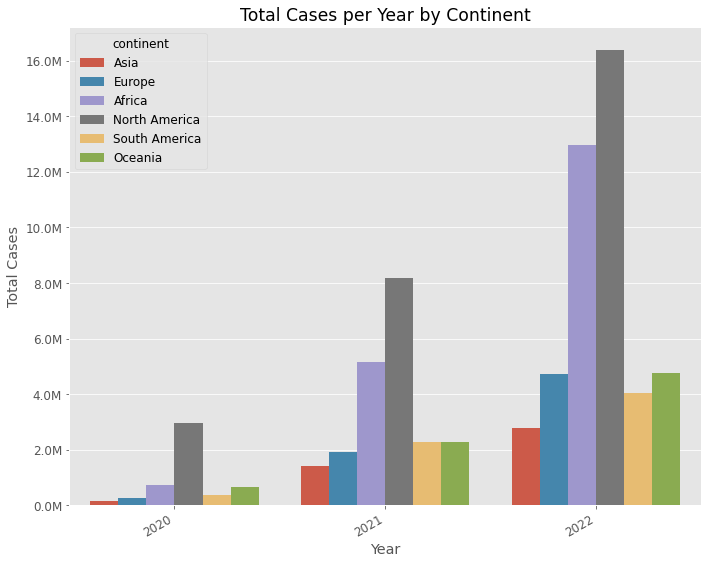

In [17]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', 
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

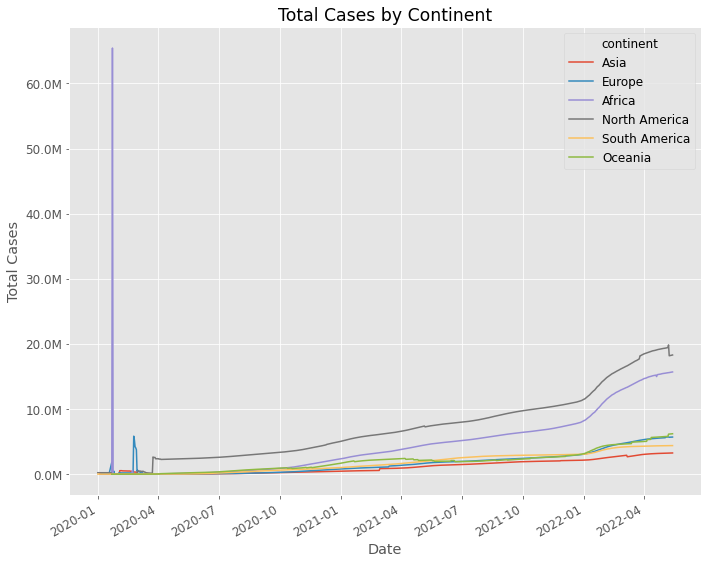

In [18]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

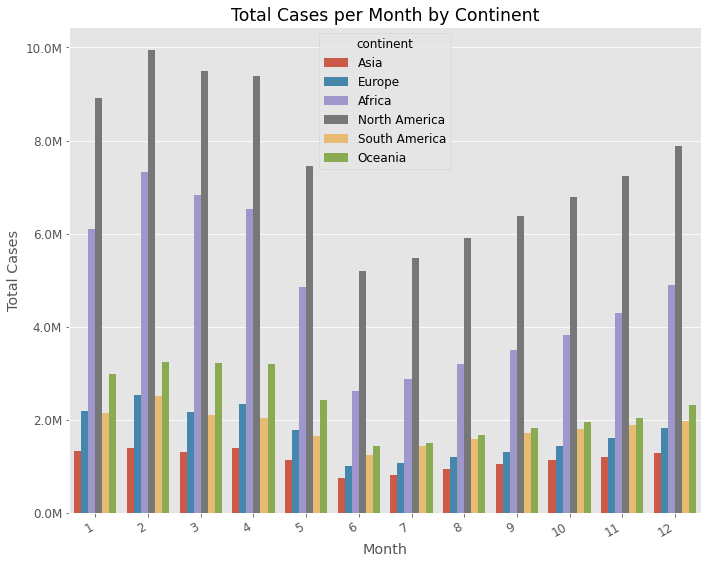

In [19]:
plot_bar(
    data=df_cases,
    x='month', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

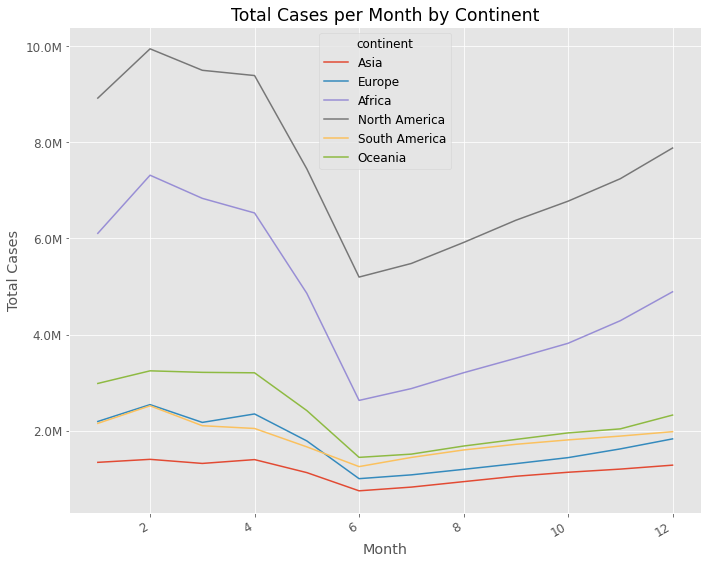

In [20]:
plot_line(
    data=df_cases,
    x='month', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

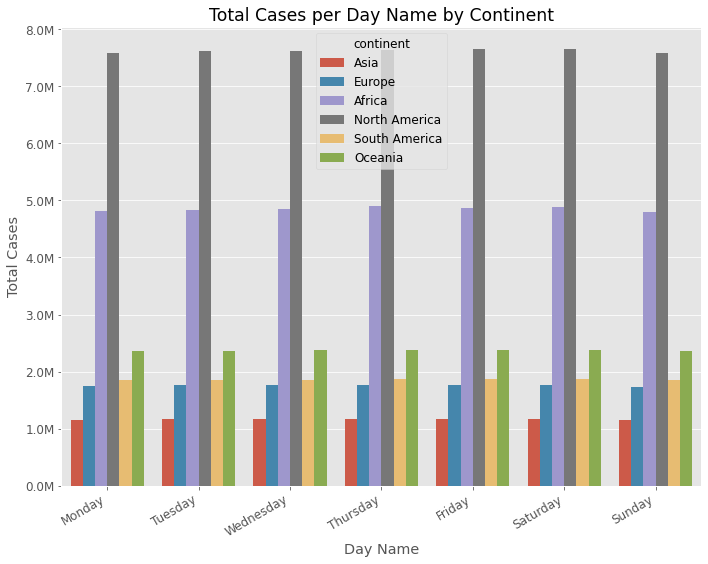

In [21]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', 
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

# Deaths Exploration

In [22]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month', 'day', 'day_name']

df_deaths = df[deaths_cols]
df_deaths.head()

,iso_code,continent,location,date,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,year,month,day,day_name
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,24,Monday
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,25,Tuesday
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,26,Wednesday
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,27,Thursday
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,28,Friday


In [23]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
count,1.609090e+05,160892.000000,159735.000000,160094.000000,160077.000000,158925.000000
mean,6.326290e+04,161.379174,162.354196,571.117762,1.612356,1.613444
std,3.301553e+05,799.998929,783.239477,855.376611,5.214035,3.540957
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.100000e+01,0.000000,0.143000,22.074000,0.000000,0.012000
50%,8.860000e+02,1.000000,2.143000,157.328500,0.100000,0.273000
75%,8.238000e+03,18.000000,19.857000,816.164000,1.265000,1.690000
max,6.263321e+06,18124.000000,14782.429000,6385.394000,550.399000,144.167000


<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

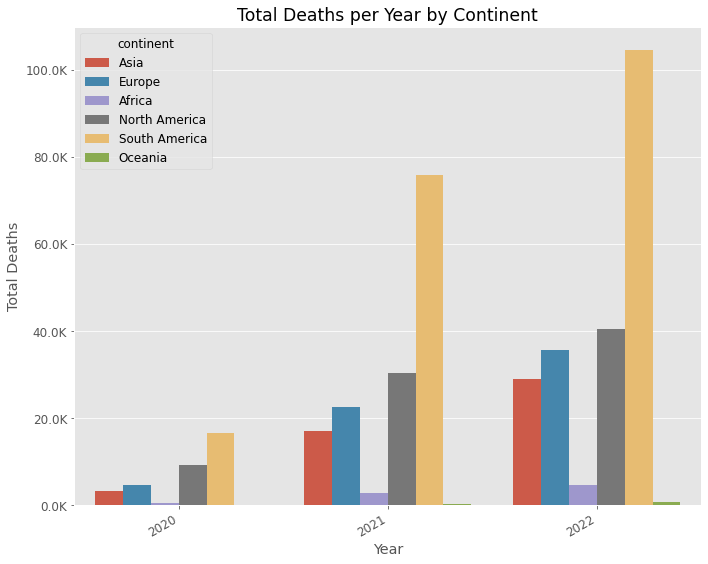

In [24]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

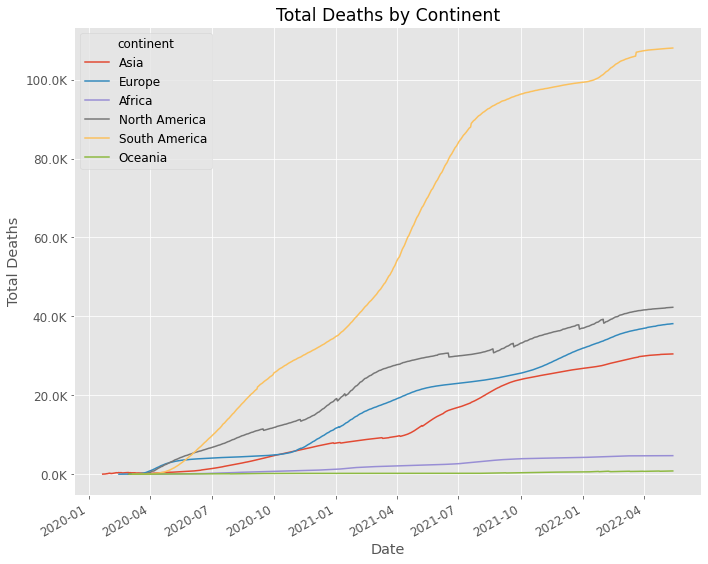

In [25]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', 
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

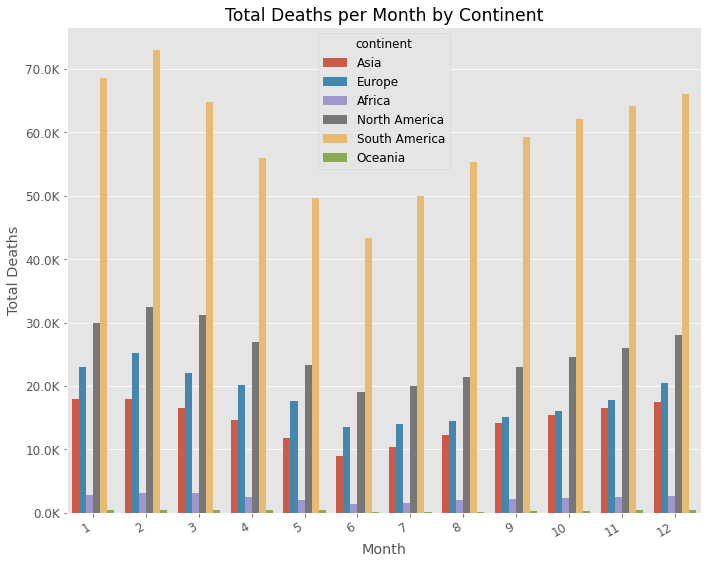

In [26]:
plot_bar(
    data=df_deaths,
    x='month', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

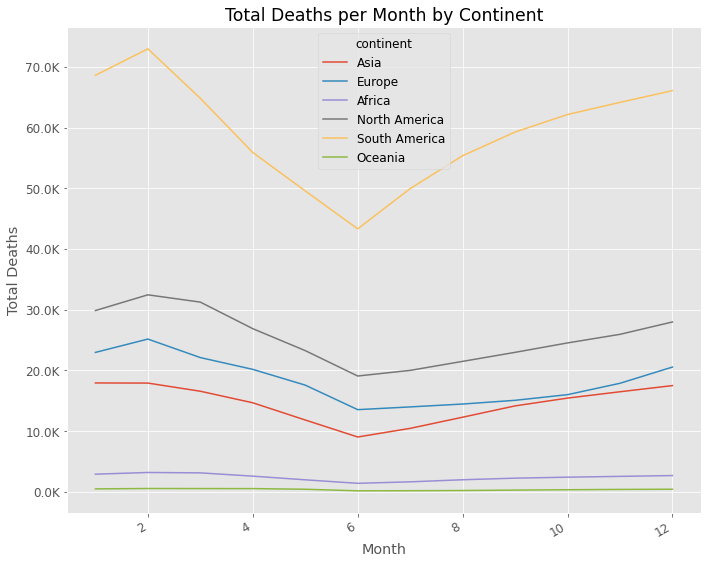

In [27]:
plot_line(
    data=df_deaths,
    x='month', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

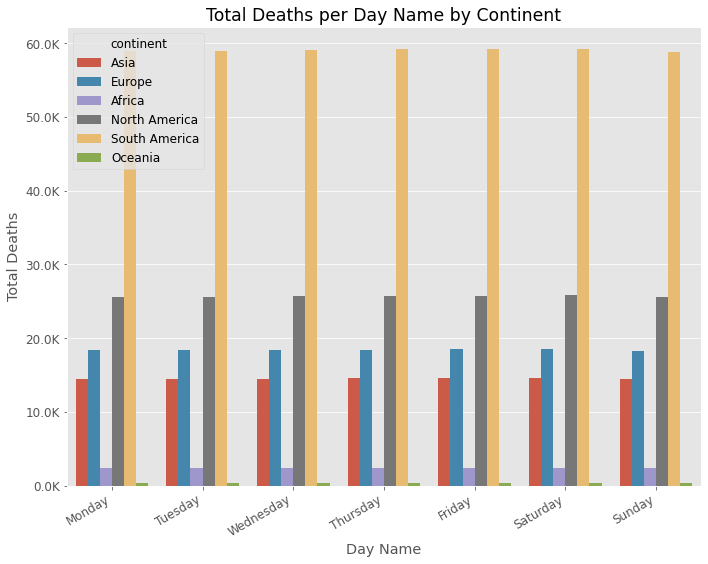

In [28]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', 
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

# Tests Exploration

In [29]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month', 'day', 
             'day_name']

df_test = df[test_cols]
df_test

,iso_code,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,year,month,day,day_name
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,24,Monday
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,25,Tuesday
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,26,Wednesday
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,27,Thursday
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,28,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186130,ZWE,Africa,Zimbabwe,2022-05-10,NaN,NaN,NaN,NaN,2767.0,0.183,0.0337,29.7,tests performed,2022,5,10,Tuesday
186131,ZWE,Africa,Zimbabwe,2022-05-11,NaN,2278641.0,150.982,NaN,2651.0,0.176,NaN,NaN,tests performed,2022,5,11,Wednesday
186132,ZWE,Africa,Zimbabwe,2022-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,5,12,Thursday
186133,ZWE,Africa,Zimbabwe,2022-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,5,13,Friday


In [30]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case
count,7.318300e+04,7.611800e+04,76118.000000,73183.000000,9.763400e+04,97634.000000,90465.000000,8.908400e+04
mean,7.888345e+04,1.961611e+07,860.212426,5.432526,1.563598e+05,4.158352,0.099683,2.526686e+03
std,8.964971e+05,8.009805e+07,2080.754742,158.239586,1.329613e+06,114.984894,0.117950,3.441336e+04
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00
25%,2.169500e+03,3.414128e+05,40.876250,0.271000,1.639000e+03,0.218000,0.018000,7.000000e+00
50%,8.606000e+03,1.925191e+06,217.271000,0.949000,7.074500e+03,0.881500,0.056700,1.720000e+01
75%,3.603750e+04,9.418385e+06,833.248500,2.910000,3.309925e+04,2.634000,0.139800,5.260000e+01
max,6.241858e+07,9.214000e+09,32925.900000,11445.391000,6.241858e+07,11445.391000,1.000000,1.023632e+06


<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

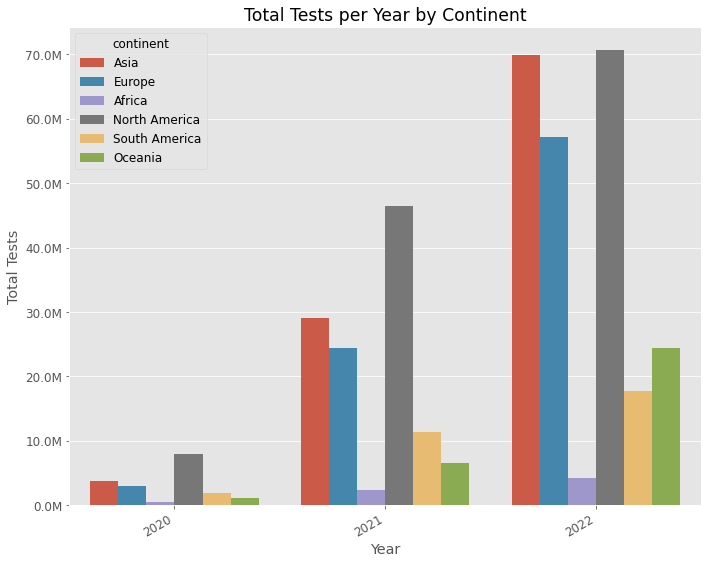

In [31]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', 
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

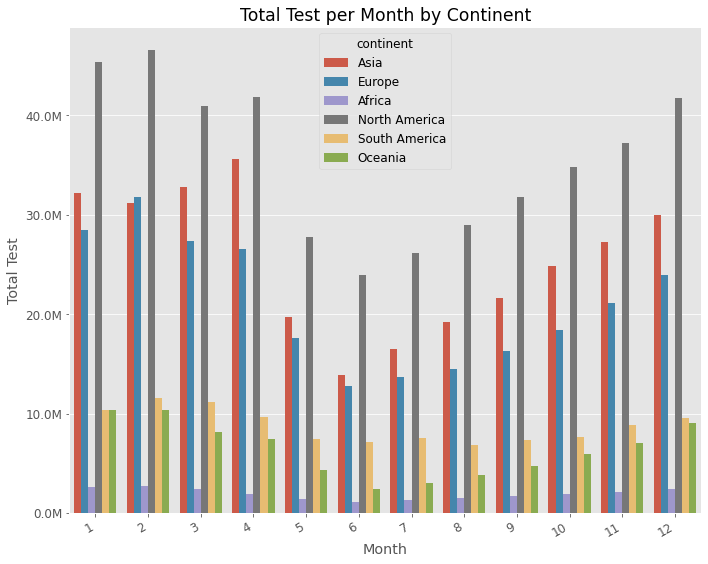

In [32]:
plot_bar(
    data=df_test,
    x='month', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

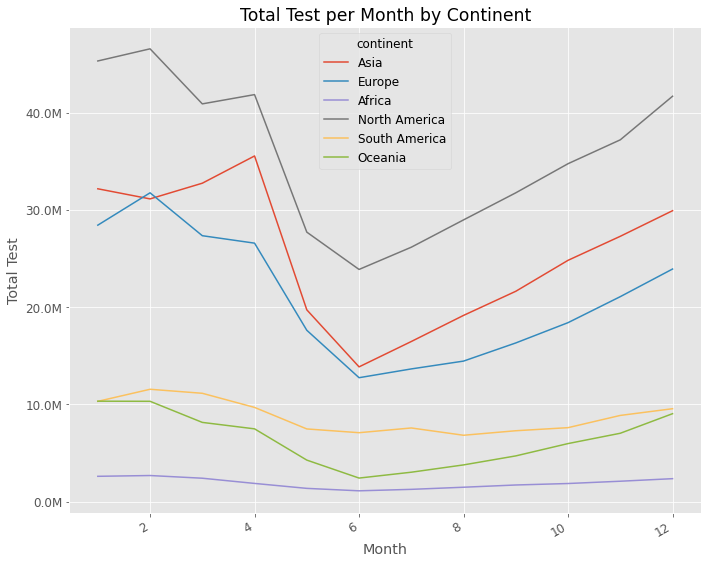

In [33]:
plot_line(
    data=df_test,
    x='month', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

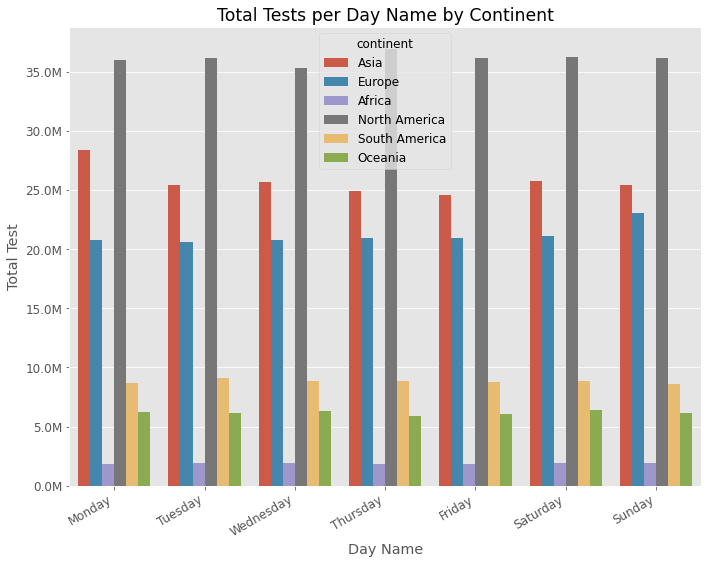

In [34]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', 
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

# Vaccinations Exploration

In [35]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month', 'day', 'day_name']

df_vacc = df[vacc_cols]
df_vacc

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,year,month,day,day_name
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,24,Monday
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,25,Tuesday
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,26,Wednesday
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,27,Thursday
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,28,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186130,ZWE,Africa,Zimbabwe,2022-05-10,10739386.0,5953536.0,3941327.0,844523.0,115991.0,56762.0,...,39.45,26.12,5.60,3761.0,11407.0,0.076,2022,5,10,Tuesday
186131,ZWE,Africa,Zimbabwe,2022-05-11,10813588.0,5979817.0,3979680.0,854091.0,74202.0,60617.0,...,39.62,26.37,5.66,4016.0,13887.0,0.092,2022,5,11,Wednesday
186132,ZWE,Africa,Zimbabwe,2022-05-12,10927750.0,6013031.0,4044192.0,870527.0,114162.0,70249.0,...,39.84,26.80,5.77,4655.0,17522.0,0.116,2022,5,12,Thursday
186133,ZWE,Africa,Zimbabwe,2022-05-13,11006269.0,6030325.0,4094186.0,881758.0,78519.0,74788.0,...,39.96,27.13,5.84,4955.0,18882.0,0.125,2022,5,13,Friday


In [36]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
count,5.077800e+04,4.828500e+04,4.578600e+04,2.280600e+04,4.167200e+04,9.939400e+04,50778.000000,48285.000000,45786.000000,22806.000000,99394.000000,9.840900e+04,98409.000000
mean,2.090854e+08,1.030694e+08,8.444417e+07,3.205835e+07,1.093524e+06,4.773035e+05,83.095889,41.366655,36.185947,16.972705,3041.247188,1.874699e+05,0.131977
std,9.143602e+08,4.499523e+08,3.840890e+08,1.451168e+08,4.052000e+06,2.634637e+06,70.339633,29.668863,28.730211,20.507609,3824.346055,1.087266e+06,0.232256
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,7.597640e+05,4.608000e+05,3.568570e+05,1.667200e+04,5.818000e+03,8.780000e+02,16.080000,11.080000,6.890000,0.070000,538.000000,3.140000e+02,0.017000
50%,6.124062e+06,3.733650e+06,2.977350e+06,9.114705e+05,4.047350e+04,8.165500e+03,71.090000,42.620000,33.320000,6.560000,1844.000000,3.231000e+03,0.059000
75%,3.782948e+07,2.143765e+07,1.753088e+07,7.050700e+06,2.753220e+05,5.946200e+04,137.877500,68.090000,62.620000,30.910000,4291.000000,2.255000e+04,0.164000
max,1.165129e+10,5.151597e+09,4.676452e+09,1.893718e+09,4.931448e+07,4.356042e+07,355.750000,124.880000,122.940000,107.920000,117497.000000,2.136827e+07,11.750000


<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

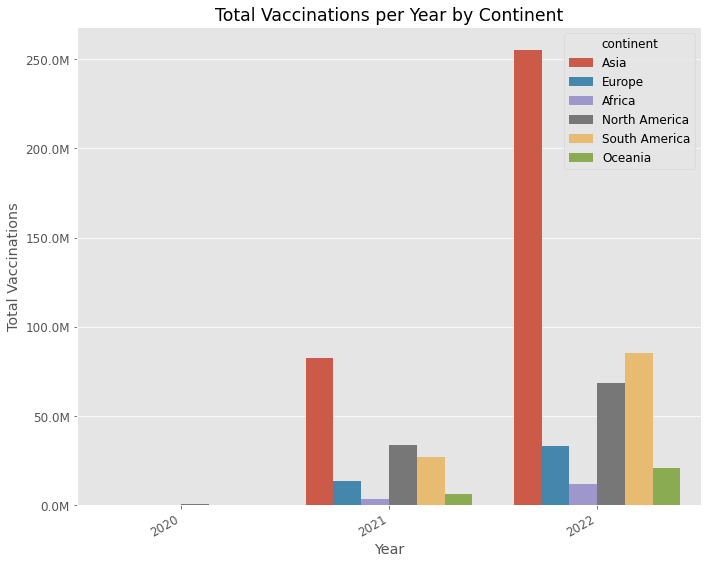

In [37]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

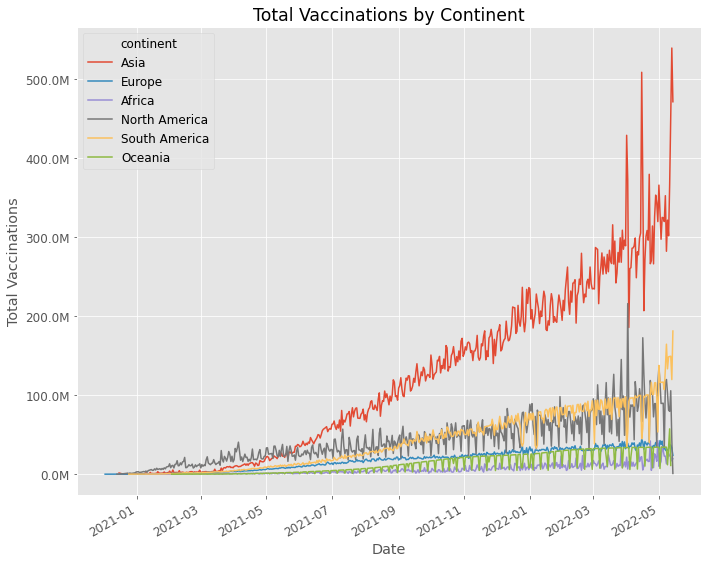

In [38]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

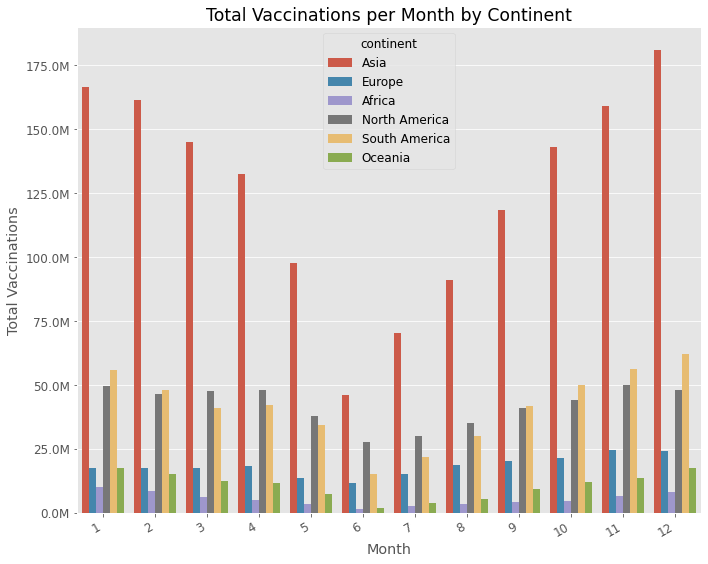

In [39]:
plot_bar(
    data=df_vacc,
    x='month', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

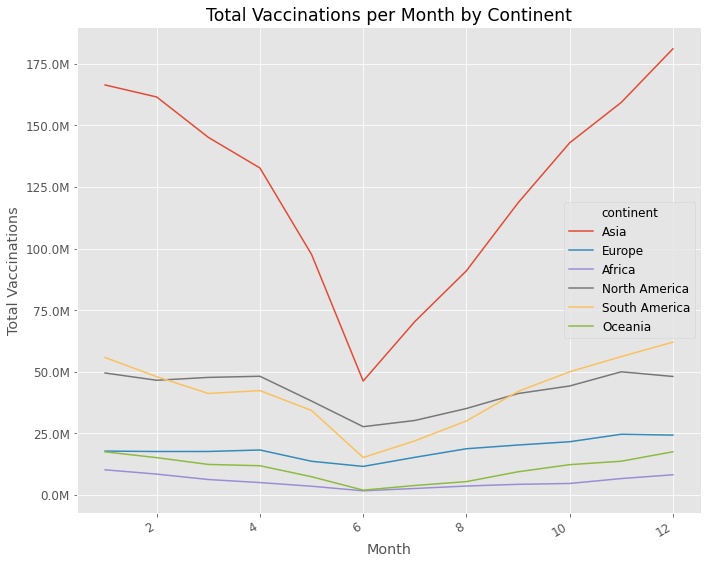

In [40]:
plot_line(
    data=df_vacc,
    x='month', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

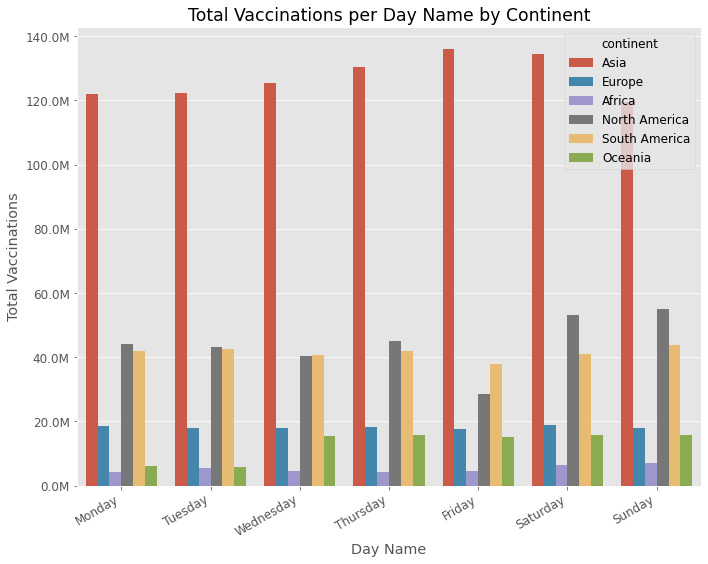

In [41]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

# Demographics Exploration

In [42]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month', 'day', 'day_name']

df_demo = df[demo_cols]
df_demo.head()

,iso_code,continent,location,date,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,...,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,day,day_name
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,54.422,18.6,2.581,1.337,1803.987,...,64.83,0.511,NaN,NaN,NaN,NaN,2020,2,24,Monday
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,54.422,18.6,2.581,1.337,1803.987,...,64.83,0.511,NaN,NaN,NaN,NaN,2020,2,25,Tuesday
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,54.422,18.6,2.581,1.337,1803.987,...,64.83,0.511,NaN,NaN,NaN,NaN,2020,2,26,Wednesday
3,AFG,Asia,Afghanistan,2020-02-27,39835428.0,54.422,18.6,2.581,1.337,1803.987,...,64.83,0.511,NaN,NaN,NaN,NaN,2020,2,27,Thursday
4,AFG,Asia,Afghanistan,2020-02-28,39835428.0,54.422,18.6,2.581,1.337,1803.987,...,64.83,0.511,NaN,NaN,NaN,NaN,2020,2,28,Friday


In [43]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.849900e+05,165813.000000,153677.000000,152042.000000,152868.000000,153306.000000,100125.000000,153337.000000,160846.000000,116348.000000,114753.000000,75577.000000,136005.000000,174033.000000,149841.000000,6.417000e+03,6417.000000,6417.000000,6417.000000
mean,1.437351e+08,459.079575,30.644672,8.833711,5.572003,19640.269275,13.593612,260.434516,8.378321,10.645658,32.789815,50.940278,3.032418,73.653332,0.725282,3.937314e+04,9.683505,15.634208,1090.258014
std,6.966911e+08,2117.037050,9.080898,6.150431,4.177708,20580.961674,20.021467,120.084997,4.688641,10.583127,13.527631,31.859790,2.449649,7.460941,0.149739,1.096858e+05,16.057381,29.134669,1545.291650
min,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,8.960050e+05,37.312000,22.300000,3.526000,2.063000,4449.898000,0.600000,168.711000,5.350000,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-2.150000e+01,-0.220000,-0.330000,-9.734468
50%,7.552800e+06,87.324000,30.600000,6.704000,4.032000,12951.839000,2.200000,243.811000,7.200000,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.898800e+03,6.460000,7.420000,548.924627
75%,3.277620e+07,214.243000,39.100000,14.312000,9.167000,27936.896000,21.200000,329.942000,10.590000,19.300000,41.300000,83.241000,4.000000,79.190000,0.845000,2.674380e+04,14.640000,21.890000,1754.244765
max,7.874966e+09,20546.766000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9725.192865


<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

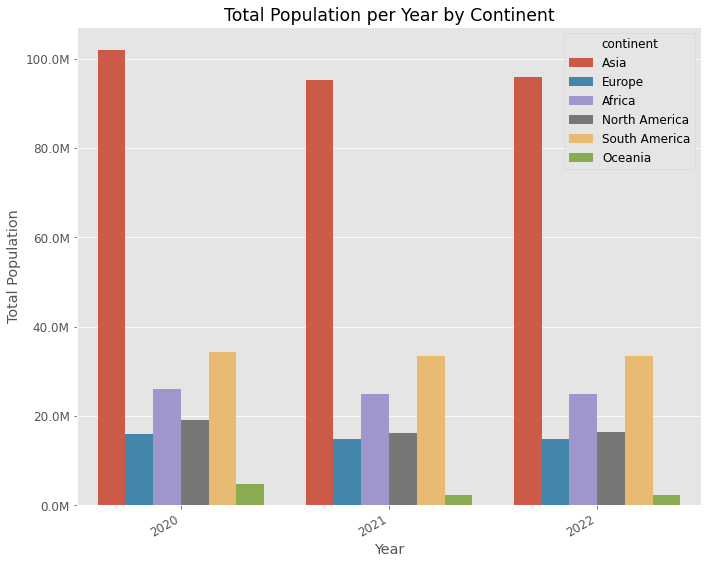

In [44]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', 
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

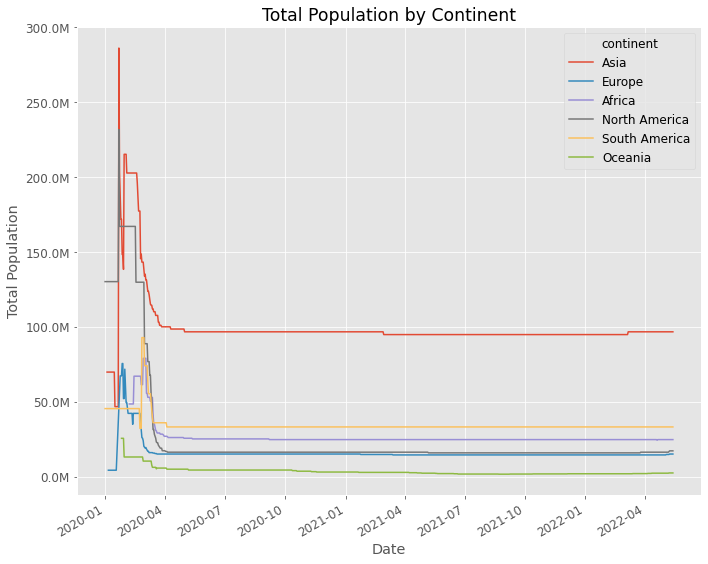

In [45]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

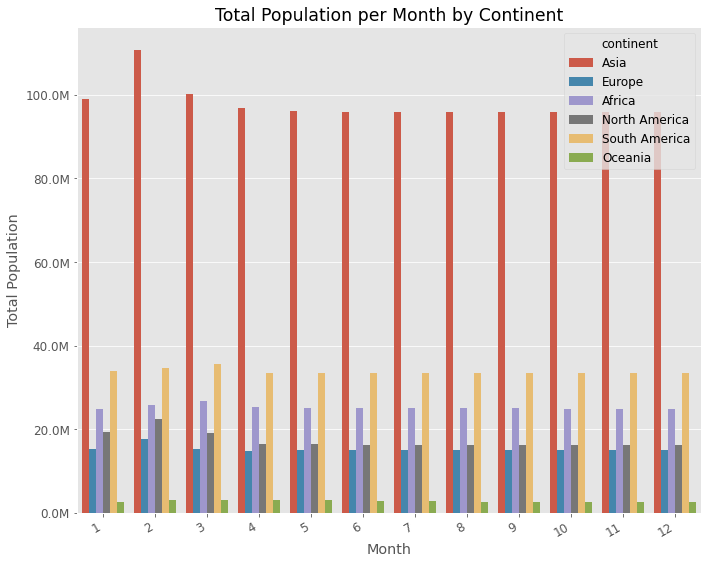

In [46]:
plot_bar(
    data=df_demo,
    x='month', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

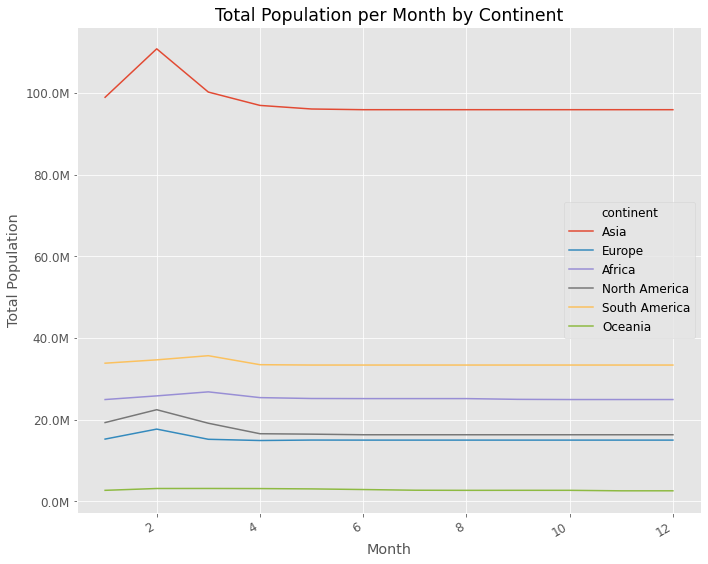

In [47]:
plot_line(
    data=df_demo,
    x='month', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

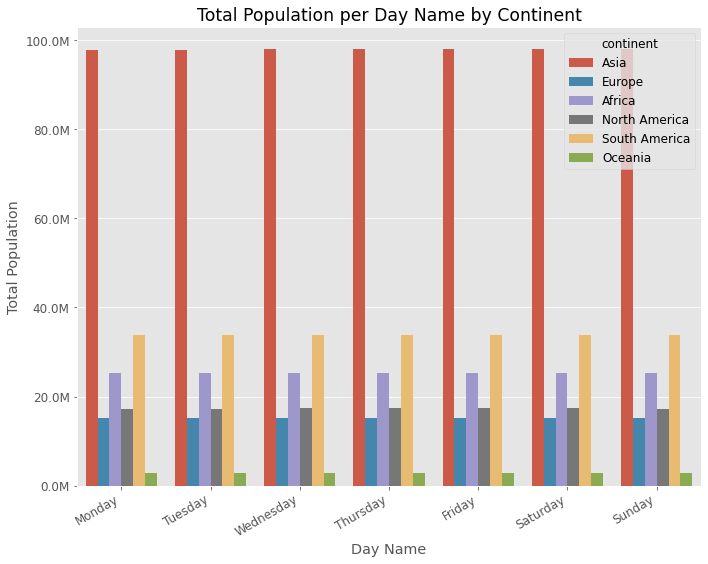

In [48]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)